In [173]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#Import these to try out the Pandas profiling tool
from pathlib import Path
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

#from 03 of ski data to do pca and and scaling. 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#sb_utils throws error
#from library.sb_utils import save_file

# Mental Health in Tech Industry <a id='Exploratory_Data_Analysis'></a>
source Data Set Location: https://www.kaggle.com/osmi/mental-health-in-tech-survey 

In [145]:
#Read in the data from local CSV
survey_data = pd.read_csv(r'C:\Users\kcnsd\Documents\Mental Health\survey.csv')

In [146]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [147]:
survey_data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [148]:
#survey_data.head()

In [149]:
#survey_data.tail()

In [174]:
#Use the Pandas profingling tool from the exercise. This fails due to memory error but after dropping columns it comes back moving down range.
#Question how to del with memory issues when the data is too big in the notebook?
#report = survey_data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

In [151]:
print(survey_data['Gender'].value_counts())
print(type(survey_data))

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Man                                                 2
Female                                              2
Cis Male                                            2
Female (trans)                                      2
maile                                               1
Neuter                                              1
non-binary                                          1
Enby                        

In [ ]:
'''
male = ['Male ', 'male', 'male ', 'M', 'm', 'make', 'man', 'cis man', 'malr', 'mail', 'mal', 'Make', 'Male', 'Cis Male', 'Cis Man', 'Male (CIS)', 'male (cis)', 'Mal', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'maile', 'msle', 'Mail', 'Man']
female = ['Female', 'female', 'female ', 'femake', 'cis female', 'F', 'f', 'Woman', 'Female ', 'cis-female/femme', 'Femake', 'Cis Female', 'femail', 'woman', 'Female (cis)', 'female (cis)']
trans_other = ['Nah','non-binary','Male-ish','trans-female','queer','Guy (-ish) ^_^','enby','Androgyne','neuter','queer/she/they','nah','Agender','Genderqueer','male leaning androgynous','fluid','trans woman','Female (trans)',"Trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "Enby", "fluid", "genderqueer", "Androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "Trans woman", "Neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"] 

survey_data.Gender = survey_data.Gender.replace(male, 'male')
survey_data.Gender = survey_data.Gender.replace(female, 'female')
survey_data.Gender = survey_data.Gender.replace(trans_other, 'trans/other')'''

In [169]:
#survey_data['Gender'] = survey_data['Gender'].str.strip()
#survey_data['Gender'] = survey_data['Gender'].str.upper()
mapping = {'Male': 'M',
           'male': 'M',
           'Make': 'M',
           'Man' :  'M',
           'Cis Male': 'M',
           'something kinda male?': 'M',
           'Mal' :  'M',
           'cis male': 'M',
           'maile':'M',
           'Male' :'M',
           '(CIS)':'M',
           'Cis Man': 'M',
           'Mail': 'M',
           'ostensibly male, unsure what that really means': 'M',
           'msle': 'M',
           'male leaning androgynous': 'M',
           'Male-ish': 'M',
           'Malr': 'M',
           'Guy (-ish) ^_^': 'M',
           'Female': 'F',
           'female': 'F',
           'Woman': 'F',
           'Female':'F',
           'Trans-female': 'F',
           'Female (trans)': 'F',
           'cis-female/femme': 'F',
           'woman': 'F',
           'Cis Female': 'F',
           'Female (cis)': 'F',
           'Femake': 'F',
           'Trans woman': 'F',
           'femail': 'F',
           'fluid': 'T',
           'Genderqueer': 'T',
           'queer/she/they': 'T',
           'non-binary': 'T',
           'All': 'T',
           'Agender': 'T',
           'Androgyne': 'T',
           'Neuter': 'T',
           'queer': 'T',
           'Enby': 'T',
           'A little about you': 'T',
           'Nah': 'T',
           'p': 'T',
           'm': 'M',
           'f': 'F',
           'Male (CIS)': 'M'
            }
survey_data['Gender'] = survey_data['Gender'].replace(mapping)
survey_data['Gender']

0       F
1       M
2       M
3       M
4       M
       ..
1254    M
1255    M
1256    M
1257    F
1258    M
Name: Gender, Length: 1242, dtype: object

In [153]:
#print(survey_data['Age'].value_counts())
#print(type(survey_data))

In [170]:
survey_data = survey_data[survey_data.Age > 18]
survey_data= survey_data[survey_data.Age < 65]

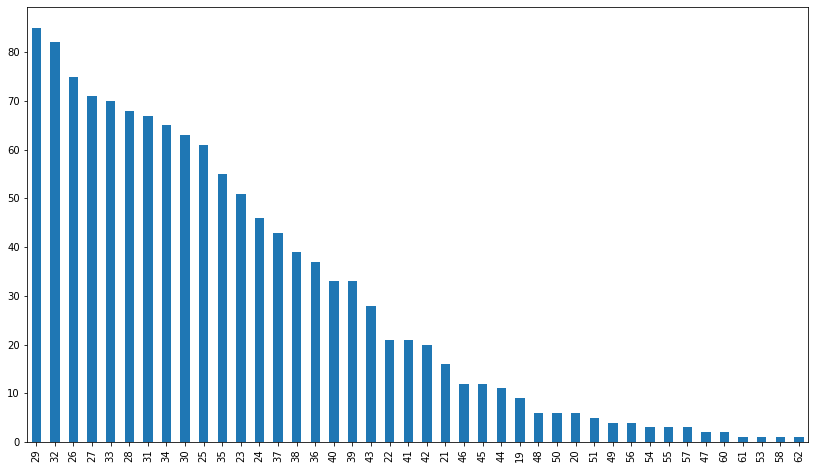

In [155]:
survey_data['Age'].value_counts().plot(kind='bar',figsize=(14,8))

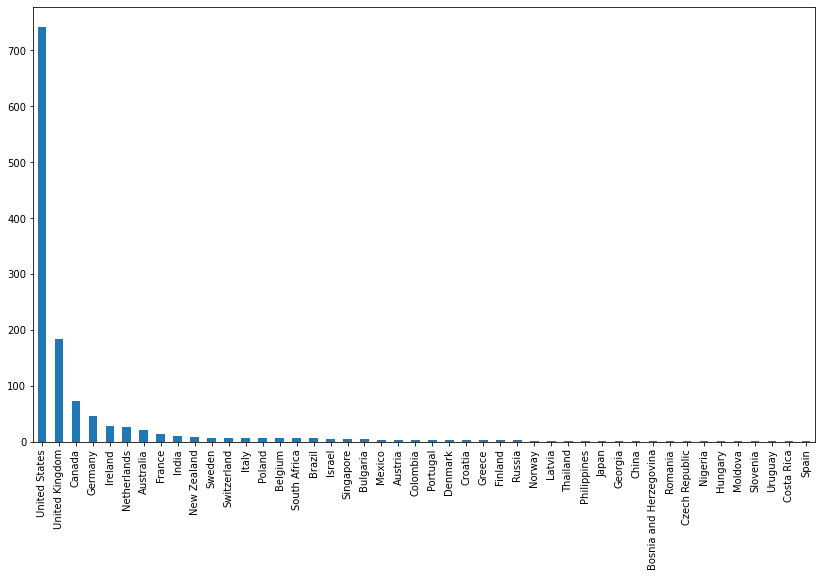

In [156]:
survey_data['Country'].value_counts().plot(kind='bar',figsize=(14,8));

In [157]:
print(survey_data.columns)

survey_data.drop('Timestamp',axis=1,inplace=True)
survey_data.drop('self_employed',axis=1,inplace=True)
survey_data.drop('state',axis=1,inplace=True)
survey_data.drop('comments',axis=1,inplace=True)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [158]:
survey_data.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,F,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,M,Canada,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,M,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,M,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [161]:
#Run the profiler here
report = survey_data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

In [166]:
#print(survey_data.columns)
print(survey_data['work_interfere'].value_counts())
survey_data['work_interfere'].isnull()

Sometimes    462
Never        210
Rarely       172
Often        139
Name: work_interfere, dtype: int64


0       False
1       False
2       False
3       False
4       False
        ...  
1254     True
1255    False
1256    False
1257     True
1258    False
Name: work_interfere, Length: 1242, dtype: bool